In [1]:
# Import Packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
# Read CSV train data
train = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\train_final.csv")
#train['date'] = pd.to_datetime(train['date'])
state_list = train['state'].unique()

In [7]:
state_list = train['state'].unique()
state='Florida'

In [8]:
#for state in state_list:
print("\n State:",state)
train_1 = train[train["state"]=='Wyoming']    
x=train_1.drop(["gross_ma","state"],1)
y=train_1[['date','gross_ma']]
x.head()


 State: Florida


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_index
6850,43876,4,3,1.0,-5,0,151.31
6851,43877,5,2,0.0,-12,0,130.14
6852,43878,2,2,2.0,6,6,128.44
6853,43879,2,4,3.0,5,0,110.26
6854,43880,0,0,-2.0,-2,0,110.25


In [9]:
print("\n State:",state)
train_1 = train[train["state"]=='Florida']    
x=train_1.drop(["date","gross_ma","state"],1)
y=train_1[['gross_ma']]


 State: Florida


In [10]:
model = linear_model.LinearRegression()      
model.fit(x, y)


LinearRegression()

In [19]:
coeff_df = pd.DataFrame(model.coef_[0], x.columns, columns=['Coefficient'])
print(coeff_df)

                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     2.011851
grocery_and_pharmacy_percent_change_from_baseline     -1.883239
parks_percent_change_from_baseline                    -1.232737
transit_stations_percent_change_from_baseline         17.942842
residential_percent_change_from_baseline             -12.335078
mobility_index                                         0.245093


In [14]:
model.coef_[0]

array([  2.01185116,  -1.88323941,  -1.23273733,  17.94284228,
       -12.33507833,   0.24509341])

In [17]:
x.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'mobility_index'],
      dtype='object')

In [18]:
x.columns

Index([u'retail_and_recreation_percent_change_from_baseline',
       u'grocery_and_pharmacy_percent_change_from_baseline',
       u'parks_percent_change_from_baseline',
       u'transit_stations_percent_change_from_baseline',
       u'residential_percent_change_from_baseline', u'mobility_index'],
      dtype='object')

In [17]:
columnlist

Index([u'retail_and_recreation_percent_change_from_baseline',
       u'grocery_and_pharmacy_percent_change_from_baseline',
       u'parks_percent_change_from_baseline',
       u'transit_stations_percent_change_from_baseline',
       u'residential_percent_change_from_baseline', u'mobility_index'],
      dtype='object')

In [23]:
model = linear_model.LinearRegression()      
model.fit(x, y)
coeff_df = pd.DataFrame(model.coef_[0], x.columns, columns=['Coefficient'])
print(coeff_df)

                                                    Coefficient
retail_and_recreation_percent_change_from_baseline    10.413179
grocery_and_pharmacy_percent_change_from_baseline     10.413179
parks_percent_change_from_baseline                    10.413179
transit_stations_percent_change_from_baseline         10.413179
residential_percent_change_from_baseline              10.413179
mobility_index                                        10.413179


In [36]:
x_test.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'mobility_index'],
      dtype='object')


Output

            Actual   Predicted
date                          
2020-07-01  684.00  754.820212
2020-07-02  681.43  765.396156
2020-07-03  679.00  658.619136
2020-07-04  656.57  441.509903
2020-07-05  653.86  607.600666


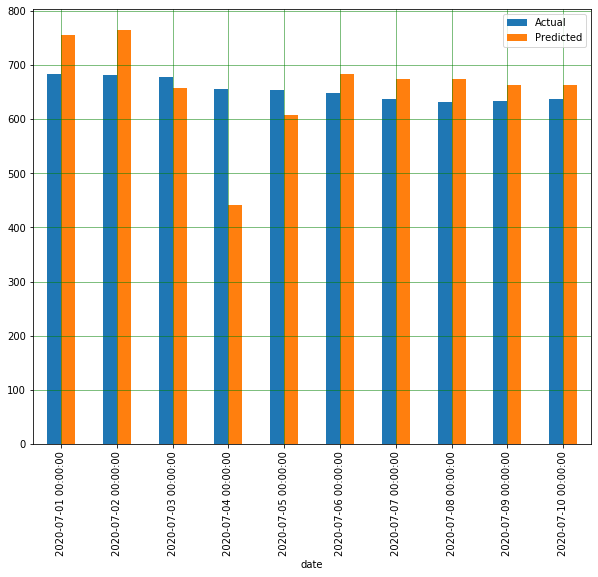

Intercept: 
 1049.6896023823863
Root Mean Square Error 
 81.58869673775008
R^2 Value: 
 -16.74970834349216


In [42]:
df_test = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\test_final.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Texas']
data_test = data_test.drop("state",1)
data_test = data_test.set_index("date",drop=True)

x_test=data_test.iloc[:,0:6]
#x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]
y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)


Training

In [37]:
df = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])
data = df[df['state']=='Texas']
data = data.drop("state",1)
data = data.drop("date",1)
x=data.iloc[:,0:7]
x = x.drop(["workplaces_percent_change_from_baseline"],1)
y=data["gross_ma"]
model = linear_model.LinearRegression()
model.fit(x, y)
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)


                                                    Coefficient
retail_and_recreation_percent_change_from_baseline    10.413179
grocery_and_pharmacy_percent_change_from_baseline     -0.261759
parks_percent_change_from_baseline                    -2.308659
transit_stations_percent_change_from_baseline          8.506108
residential_percent_change_from_baseline              -6.370618
mobility_index                                         1.147570


In [65]:
model.coef_

array([ 0.19449396,  0.11716075,  0.00169071, -0.09037731, -0.21572222,
        0.08240659])

In [71]:
coeff_df=pd.DataFrame(columns=x.columns)

In [75]:
Error_report=pd.DataFrame(columns=['rmsd','r2_value','intercept','mape'])

In [72]:
coeff_df

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_index


In [77]:
df = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\train_ma.csv")
df_test = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\test_forecast.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
df['date'] = pd.to_datetime(df['date'])
output=pd.DataFrame()
for state in df.state.unique():
    print("\n Running for State: "+state)
    data = df[df['state']==state]
    data = data.drop("state",1)
    data = data.drop("date",1)
    x=data.iloc[:,0:7]
    x = x.drop(["workplaces_percent_change_from_baseline"],1)
    x=x.fillna(method = 'ffill')
    x=x.fillna(method = 'bfill')
    y=data["gross_ma"]
    model = linear_model.LinearRegression()
    model.fit(x, y)
    coeff_df.loc[state]=model.coef_


    data_test = df_test[df_test['state']==state]
    data_test = data_test.drop("state",1)
    data_test = data_test.set_index("date",drop=True)

    x_test=data_test.iloc[:,0:6]
    #x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
    y_test=data_test["gross_ma"]
    x_test=x_test.fillna(method = 'ffill')
    x_test=x_test.fillna(method = 'bfill')
    y_pred = model.predict(x_test)

    out = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    out['state']=state
    output=output.append(out)
    # Root Mean Squared Deviation
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_value = r2_score(y_test, y_pred)
    intercept=model.intercept_
    mape=( abs((y_test - y_pred) / y_test).mean()) * 100
    value=[rmsd,r2_value,intercept,mape]
    Error_report.loc[state]=value

output.to_csv(r"C:\Users\kasthurirangan.sampa\Downloads\predicted_all_state.csv")
coeff_df.to_csv(r"C:\Users\kasthurirangan.sampa\Downloads\predicted_all_states_coefficient.csv")
Error_report.to_csv(r"C:\Users\kasthurirangan.sampa\Downloads\Model_Performance.csv")


 Running for State: Alabama

 Running for State: Alaska

 Running for State: Arizona

 Running for State: Arkansas

 Running for State: California

 Running for State: Colorado

 Running for State: Connecticut

 Running for State: Delaware

 Running for State: Florida

 Running for State: Georgia

 Running for State: Hawaii

 Running for State: Idaho

 Running for State: Illinois

 Running for State: Indiana

 Running for State: Iowa

 Running for State: Kansas

 Running for State: Kentucky

 Running for State: Louisiana

 Running for State: Maine

 Running for State: Maryland

 Running for State: Massachusetts

 Running for State: Michigan

 Running for State: Minnesota

 Running for State: Mississippi

 Running for State: Missouri

 Running for State: Montana

 Running for State: Nebraska

 Running for State: Nevada

 Running for State: New Hampshire

 Running for State: New Jersey

 Running for State: New Mexico

 Running for State: New York

 Running for State: North Carolina

 Ru

In [74]:
( abs((y_test - y_pred) / y_test).mean()) * 100

10.664170435561381

   Actual   Predicted
1     634  670.433201
3     638  709.859339
5     663  711.897202
7     666  691.320945


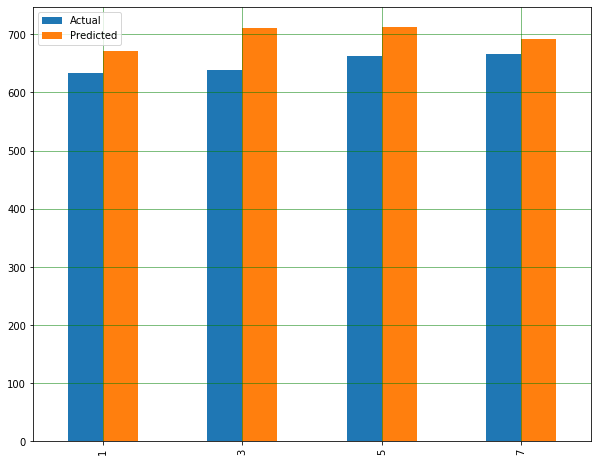

Intercept: 
 1049.6896023823863
Root Mean Square Error 
 48.79351737911673
R^2 Value: 
 -10.546807339078104
My MAPE: 7.0467170427163754


In [22]:
df_test = pd.read_csv(r"C:\Users\kasthurirangan.sampa\Downloads\forecast.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Texas']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)
x_test=data_test.iloc[:,0:6]
#x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



In [61]:
x_test.columns[x_test.isna().any()].tolist()

[]

In [79]:
x.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'mobility_index'],
      dtype='object')